# Samping

- The data set is about basketball players in WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the season 2016-2017.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the dataset

In [3]:
wnba = pd.read_csv("datasets\wnba.csv")

In [4]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [5]:
wnba.shape

(143, 32)

In [6]:
wnba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          143 non-null    object 
 1   Team          143 non-null    object 
 2   Pos           143 non-null    object 
 3   Height        143 non-null    int64  
 4   Weight        142 non-null    float64
 5   BMI           142 non-null    float64
 6   Birth_Place   143 non-null    object 
 7   Birthdate     143 non-null    object 
 8   Age           143 non-null    int64  
 9   College       143 non-null    object 
 10  Experience    143 non-null    object 
 11  Games Played  143 non-null    int64  
 12  MIN           143 non-null    int64  
 13  FGM           143 non-null    int64  
 14  FGA           143 non-null    int64  
 15  FG%           143 non-null    float64
 16  15:00         143 non-null    int64  
 17  3PA           143 non-null    int64  
 18  3P%           143 non-null    

In [9]:
wnba["Games Played"].describe()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

### 1 - Create a Random Sample

In [7]:
sample_size = 30
sample = wnba["Games Played"].sample(sample_size, random_state = 1)
sample.describe()

count    30.000000
mean     23.933333
std       7.519782
min       4.000000
25%      20.000000
50%      28.000000
75%      29.000000
max      30.000000
Name: Games Played, dtype: float64

### Sampling Error

In [10]:
parameter = wnba["Games Played"].max()
parameter

32

In [13]:
statistic = sample.max()
statistic

30

In [14]:
samping_error = parameter - statistic
samping_error

2

### Visualizing Samping Error

In [26]:
# Sampling error in average points scored
population_mean = wnba['PTS'].mean()
population_mean

201.7902097902098

In [27]:
sample_means = []

for i in range(1,100):
    sample_means.append(wnba['PTS'].sample(10, random_state = i).mean())

sample_means[0:5]

[185.4, 140.4, 293.7, 172.7, 124.9]

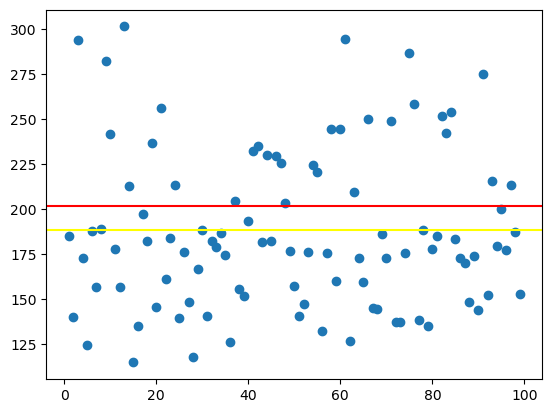

In [28]:
plt.scatter(range(1,100), sample_means)
plt.axhline(population_mean, c = "red")
plt.axhline(np.mean(sample_means), c = "yellow")
plt.show()

### Stratified Sampling

In [30]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [29]:
wnba['Pos'].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

In [14]:
wnba['points_per_game'] = wnba["PTS"] / wnba["Games Played"]

In [15]:
wnba.head(2)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,points_per_game
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,22,28,12,3,6,12,93,0,0,11.625000
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,82,101,72,63,13,40,217,0,0,7.233333


In [16]:
F = wnba[wnba['Pos'] == 'F']
GF = wnba[wnba['Pos'] == 'G/F']
G = wnba[wnba['Pos'] == 'G']
C = wnba[wnba['Pos'] == 'C']
FC = wnba[wnba['Pos'] == 'F/C']

In [17]:
print([F.shape[0], GF.shape[0], G.shape[0], C.shape[0], FC.shape[0]])

[33, 13, 60, 25, 12]


In [18]:
point_per_position = {}

In [19]:
stratums = {
    'F' : F,
    'G/F' : GF,
    'G': G,
    'C' : C,
    'F/C' : FC
}

In [20]:
for k in stratums.keys():
    point_per_position[k] = stratums[k]['points_per_game'].sample(10, random_state = 0).mean()

In [21]:
point_per_position

{'F': 8.702175158545568,
 'G/F': 6.817264935760487,
 'G': 7.092926195632343,
 'C': 9.833761394334251,
 'F/C': 9.059118773946361}

In [22]:
position_most_points = max(point_per_position, key = point_per_position.get)
position_most_points

'C'

### Quota Sampling

In [41]:
less_than_12 = wnba[wnba['Games Played'] <= 12]
between_12_and_22 = wnba[(12 < wnba['Games Played']) & (wnba['Games Played'] <= 22)]
more_than_22 = wnba[wnba['Games Played'] > 22]

In [42]:
quata_means = []

In [43]:
for i in range(100):
    s_12 = less_than_12.sample(1, random_state = i )
    s_12_22 = between_12_and_22.sample(2, random_state = i)
    s_22 = more_than_22.sample(7, random_state = i)
    s_all = pd.concat([s_12,s_12_22,s_22])
    quata_means.append(s_all['PTS'].mean())

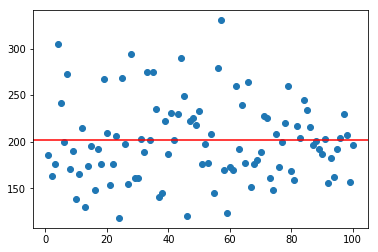

In [26]:
plt.scatter(range(1,101), quata_means)
plt.axhline(wnba['PTS'].mean(), c = "red")
plt.show()

### Cluster Sampling

In [28]:
wnba['Team'].unique()

array(['DAL', 'LA', 'CON', 'SAN', 'MIN', 'SEA', 'PHO', 'CHI', 'WAS', 'NY',
       'ATL', 'IND'], dtype=object)

In [32]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

In [34]:
sample = pd.DataFrame()

for c in clusters:
    sample = sample.append(wnba[wnba['Team'] == c])
    
sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

In [35]:
print(sampling_error_height)
print(sampling_error_age)
print(sampling_error_BMI)
print(sampling_error_points)

-0.06400121617511445
-1.401337792642142
0.23095444165950596
-27.79674673152934
